
# This notebook is based the python module **Diffractio** 
### see  https://diffractio.readthedocs.io/en/latest/ and https://bitbucket.org/optbrea/diffractio/src/master/docs/readme.rst?mode=view

by Luis Miguel Sanchez Brea <optbrea@ucm.es>

Universidad Complutense de Madrid, Faculty of Physical Sciences, Department of Optics Plaza de las ciencias 1, ES-28040 Madrid (Spain)

# The notebook uses Diffractio as a design tool for diffraction gratings for Grating magneto-optical traps GMOTS see:- http://dx.doi.org/10.1038/Nnano.2013.47


Author 
Charlie Ironside
Department of Physics and Astronomy,
Curtin University
https://staffportal.curtin.edu.au/staff/profile/view/Charlie.Ironside/

Charlie.ironside@curtin.edu.au

Sept 2020.


Edited by Xiao Sun
xiao.sun@uwa.edu.au
Curtin University
Oct. 2020


It is written on Google's Colab platform
https://colab.research.google.com/notebooks/intro.ipynb#recent=true



The first part installs the Diffractio package and additonal packages as described in :- https://diffractio.readthedocs.io/en/latest/installation.html

In [14]:
# !pip install hickle
# !pip install mayavi
# !pip install py-pol
# !pip install diffractio

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

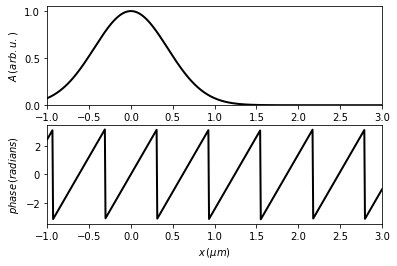

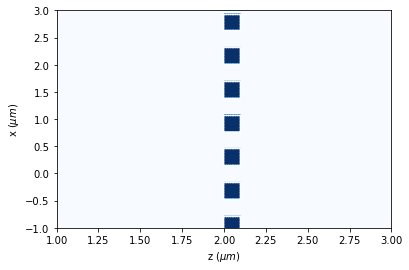

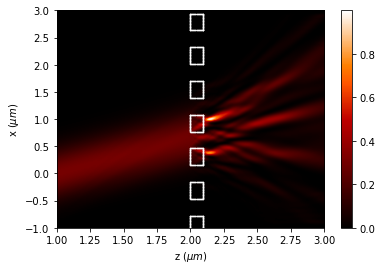

In [52]:
################### Binary grating ###################
################### 2D propagation ###################

from diffractio import um, nm, mm, np,degrees
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY


x0 = np.linspace(-1 * um, 3* um, 512)
z0 = np.linspace(1 * um, 3 * um, 512)

wavelength = 0.399 * um
period = 0.62 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=0.62* um, theta=40* degrees) ## w0: waist radius, beam size
u0.draw(kind='field', filename='xz_source.png')

####################### XZ plan #######################################################

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength) ## 2D grating
t1.incident_field(u0)
t1.ronchi_grating(
    period = period,
    fill_factor=.5, ## DIFFERENT DIFINITION!! =1-(fill factor)
    length=10 * um, ## grating range
    height=0.1 * um, ## height of ridges
    r0=(0 * um, 2 * um), ## centre position
    Dx=0* um,
    refraction_index=3.5, ## silicon
    heigth_substrate=0* um, ## thickness of substrate
    refraction_index_substrate=3.5,
    angle=0 * degrees)
t1.draw_refraction_index(filename='grating.png'); ## draw refraction index distribution

t1.BPM()
t1.draw(logarithm=False, normalize='maximum', draw_borders=True,colorbar_kind='vertical',filename='Optical_Diff.png'  )



Good result: factor 40.83


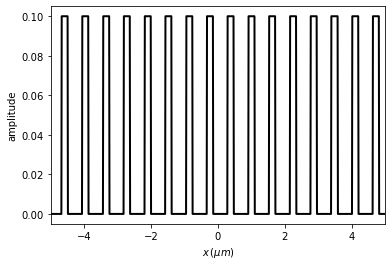

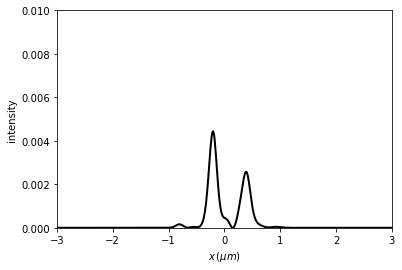

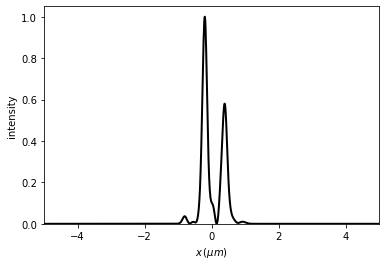

In [3]:
################### Binary grating ###################
################### 1D ###################

from diffractio import um, nm, mm, np,degrees
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from scipy.fftpack import fft, fftshift, ifft



num_pixels = 1024

length = 10 * um

x0 = np.linspace(-length/2, length/2, num_pixels)
y0 = np.linspace(-length/2, length/2, num_pixels)
z0 = np.linspace(-length/2, length/2, num_pixels)


wavelength = 0.399 * um
period = 0.62 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=0.62* um, theta=40* degrees) ## w0: waist radius, beam size
# u0.draw(kind='field', filename='x_source.png')  # draw source


####################### X-axis  #######################################################
fill_factor=0.3

Grating_Binary = Scalar_mask_X(x=x0, wavelength=wavelength) ## 1D 
Grating_Binary.binary_grating(
    period=period,
    amin=0,
    amax=0.1,
    phase=np.pi,
    x0=1* um,
    fill_factor=fill_factor)
Grating_Binary .draw('amplitude')

out=u0*Grating_Binary



out_Distance = out.RS(z=0.1* um, new_field=True, verbose=True)  # intensity at z=**um

out_Distance.draw(kind='intensity',filename='x_out_'+str(fill_factor)+'.png')
plt.ylim(0, 0.01)
plt.xlim(-3*um, 3*um)
plt.savefig('x_out_'+str(fill_factor)+'.png')


#out_Distance.draw(kind='intensity',normalize='maximum')



Good result: factor 40.83


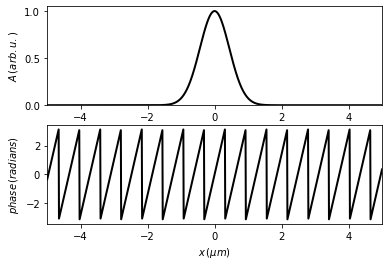

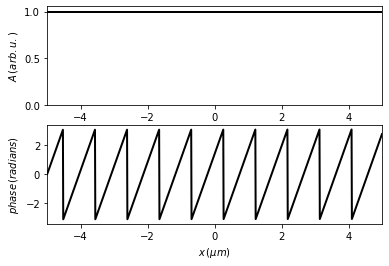

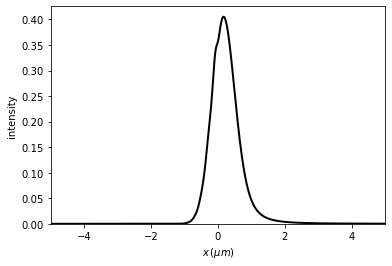

In [2]:
################### Blazed grating ###################
################### 1D ###################


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

num_pixels = 1024

length = 10 * um
height = 0.1 * um


x0 = np.linspace(-length/2, length/2, num_pixels)
y0 = np.linspace(-length/2, length/2, num_pixels)
z0 = np.linspace(-length/2, length/2, num_pixels)


wavelength = 0.399 * um
period = 0.6 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=0.62* um, theta=40* degrees) ## w0: waist radius, beam size
u0.draw(kind='field', filename='x_source.png')  # draw source


####################### X-axis  #######################################################
fill_factor=0.5

Grating_Blazed = Scalar_mask_X(x=x0, wavelength=wavelength) ## 1D 
Grating_Blazed.blazed_grating(
    period= period,
    height= height,
    n=3.5,
    x0=0 * um)
Grating_Blazed.draw(kind='field')

out=u0*Grating_Blazed


out_Distance = out.RS(z=0.1* um, new_field=True, verbose=True)  # intensity at z=* *um

out_Distance.draw(kind='intensity',filename='x_out.png')
# plt.ylim(0, 0.01)
# plt.xlim(-3*um, 3*um)
#plt.savefig('x_out.png')

#out_Distance.draw(kind='intensity',normalize='maximum')


